In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
years = list(range(2000,2024))


In [ ]:
market_values = []
quantities = []

In [ ]:
for year in years:
  URL:str = f"https://wits.worldbank.org/trade/comtrade/en/country/LKA/year/{year}/tradeflow/Exports/partner/ALL/product/040900"
  response = requests.get(URL)
  if response.status_code > 300:
    raise Exception("Cannot access data")

  soup = BeautifulSoup(response.text, "html.parser")
  content = soup.find("div", {"class": "content"})

  pattern_for_market_value = r"\$([\d.]+)K"
  quantity_pattern = r"([\d,]+)Kg"
  regex_match_market_value = re.search(pattern_for_market_value, content.text)
  regex_match_quantity = re.search(quantity_pattern, content.text)
  if regex_match_market_value and regex_match_quantity:
    market_value = float(regex_match_market_value.group(1))
    quantity = int(regex_match_quantity.group(1).replace(",", ""))
    market_values.append(market_value)
    quantities.append(quantity)
  else:
    print("No match found",year)
    years.remove(year)


print(len(market_values))
print(quantities)
print(len(years))


23
[460, 70, 997, 1382, 2274, 1299, 564, 714, 802, 1353, 2887, 2107, 4424, 2675, 3479, 2234, 1505, 782, 18933, 59507, 56756, 34716, 3424]
23


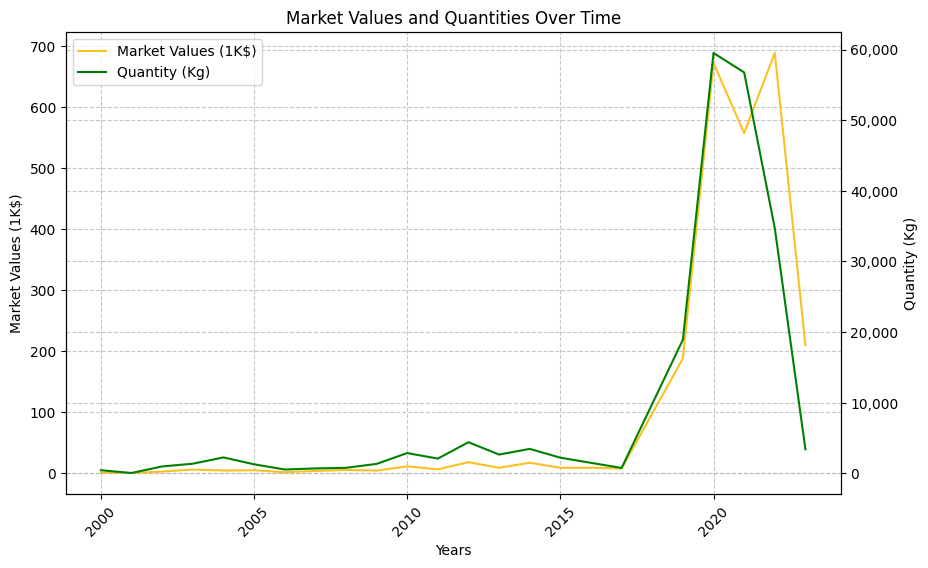

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create the main plot for market values with left y-axis
ax1 = plt.subplot(111)  # Create a single subplot
market_values_line, = ax1.plot(years, market_values, label="Market Values (1K$)", color='#FBC122')
ax1.set_xlabel("Years")
ax1.set_ylabel("Market Values (1K$)")  # Set label color to match line color

# Create a twin axis for quantities with right y-axis
ax2 = ax1.twinx()  # Create a twin axis that shares the x-axis
quantities_line, = ax2.plot(years, quantities, label="Quantity (Kg)", color='g')
ax2.set_ylabel("Quantity (Kg)")  # Set label color to match line color

ax1.grid(True, linestyle='--', alpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Format numbers
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:,.0f}"))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x:,.0f}"))


# Annotate a specific point (e.g., highest market value)
highest_value_index = market_values.index(max(market_values))


# Customize the plot
plt.title("Market Values and Quantities Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.show()


In [ ]:

print(market_values)